In [1]:
import numpy as np
from numpy import genfromtxt
from numba import njit
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # used to make plots look nicer

In [2]:
ground_motion = genfromtxt('ElcentroNS.csv', delimiter=',')[:750,:]
ground_motion[0,0]=0.0
time = ground_motion[:,0]
ground_motion = ground_motion[:,1]
t_span = (time[0], time[-1])
g=386.4
u0 = (0.0, 0.0)
rtol=atol=1e-5

In [3]:
@njit
(float64, array(float64, 1d, C))
def EOM_num(t, y):
    i = np.argmin(np.abs(time - t))
    D, dDdt = y
    dydt = [dDdt, -ground_motion[i]*g-omega**2*D-2*zeta*omega*dDdt]
    return dydt

def EOM(t, y):
    i = np.argmin(np.abs(time - t))
    D, dDdt = y
    dydt = [dDdt, -ground_motion[i]*g-omega**2*D-2*zeta*omega*dDdt]
    return dydt

def ElcentroNumba(zeta, omega):
    sol = solve_ivp(EOM_num, y0=u0, t_span=t_span, rtol=rtol, atol=atol)
    D = sol.y[0,:]
    t = sol.t
    return t, D

def Elcentro(zeta, omega):
    sol = solve_ivp(EOM, y0=u0, t_span=t_span, rtol=rtol, atol=atol)
    D = sol.y[0,:]
    t = sol.t
    return t, D

In [4]:
zeta = 0.05
Tn = 2
omega = np.pi*2/Tn

In [5]:
%%timeit
t, D = Elcentro(zeta, omega)

5.27 s ± 230 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
# %%timeit
t, D = ElcentroNumba(zeta, omega)

5.37841842246501

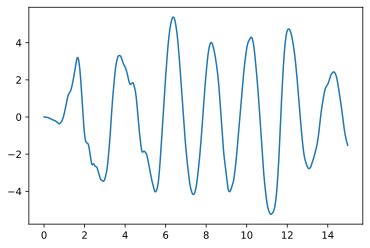

In [10]:
t, D = ElcentroNumba(zeta, omega)
fig, ax = plt.subplots()
ax.plot(t, D)
max(D)

In [11]:
EOM_num.inspect_types()

EOM_num (float64, array(float64, 1d, C))
--------------------------------------------------------------------------------
# File: <ipython-input-3-f7f3f37f5953>
# --- LINE 1 --- 
# label 0

@njit

# --- LINE 2 --- 

def EOM_num(t, y):

    # --- LINE 3 --- 
    #   t = arg(0, name=t)  :: float64
    #   y = arg(1, name=y)  :: array(float64, 1d, C)
    #   $0.1 = global(np: <module 'numpy' from 'C:\\Users\\claud\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)  :: Module(<module 'numpy' from 'C:\\Users\\claud\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
    #   $0.2 = getattr(value=$0.1, attr=argmin)  :: Function(<function argmin at 0x00000221DA104438>)
    #   del $0.1
    #   $0.3 = global(np: <module 'numpy' from 'C:\\Users\\claud\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)  :: Module(<module 'numpy' from 'C:\\Users\\claud\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
    #   $0.4 = getattr(value=$0.3, attr=abs)  :: Function(<ufunc 'absolute'>)
    #  